## Imports

Here, we import the main libraries of Cartopy: crs and feature. In addition, we import numpy, as well as matplotlib’s pyplot interface. Finally, we import a library called warnings, and use it to remove extraneous warnings that Cartopy produces in later examples.

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

# Suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings('ignore')

## Basic concepts: map projections and GeoAxes

### Extend Matplotlib’s axes into georeferenced GeoAxes

Recall from earlier tutorials that a figure in Matplotlib has two elements: a Figure object, and a list of one or more Axes objects (subplots).

Since we imported cartopy.crs, we now have access to Cartopy’s Coordinate Reference System, which contains many geographical projections. We can specify one of these projections for an Axes object to convert it into a GeoAxes object. This will effectively georeference the subplot. Examples of converting Axes objects into GeoAxes objects can be found later in this section.

### Create a map with a specified projection

In this example, we’ll create a GeoAxes object that uses the PlateCarree projection. 

PlateCarree is a global lat-lon map projection in which each point is evenly spaced in terms of degrees. The name “Plate Carree” is French for “flat square”.

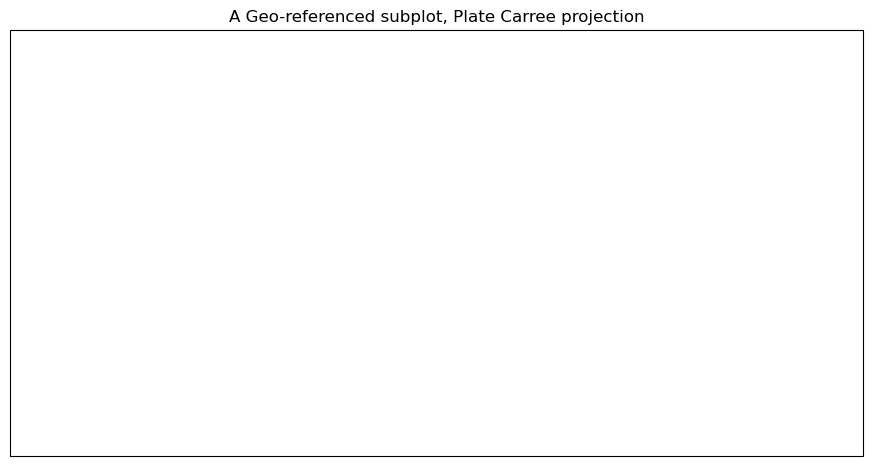

In [3]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-75))
ax.set_title("A Geo-referenced subplot, Plate Carree projection");

Although the figure seems empty, it has, in fact, been georeferenced using a map projection; this projection is provided by Cartopy’s crs (coordinate reference system) class. 

We can now add in cartographic features, in the form of shapefiles, to our subplot. One such cartographic feature is coastlines, which can be added to our subplot using the callable GeoAxes method simply called coastlines.

In [4]:
ax.coastlines()

Info

To get the figure to display again with the features that we’ve added since the original display, just type the name of the Figure object in its own cell.

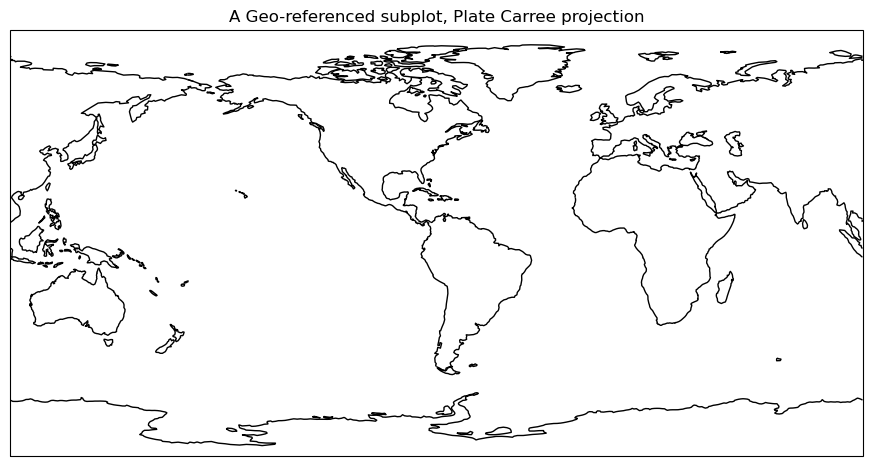

In [5]:
fig

#### Add cartographic features to the map

Cartopy provides other cartographic features via its features class, which was imported at the beginning of this page, under the name cfeature. These cartographic features are laid out as data in shapefiles. The shapefiles are downloaded when their cartographic features are used for the first time in a script or notebook, and they are downloaded from https://www.naturalearthdata.com/. Once downloaded, they “live” in your ~/.local/share/cartopy directory (note the ~ represents your home directory).

We can add these features to our subplot via the add_feature method; this method allows the definition of attributes using arguments, similar to Matplotlib’s plot method. A list of the various Natural Earth shapefiles can be found at https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html. In this example, we add borders and U. S. state lines to our subplot:

In [6]:
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')

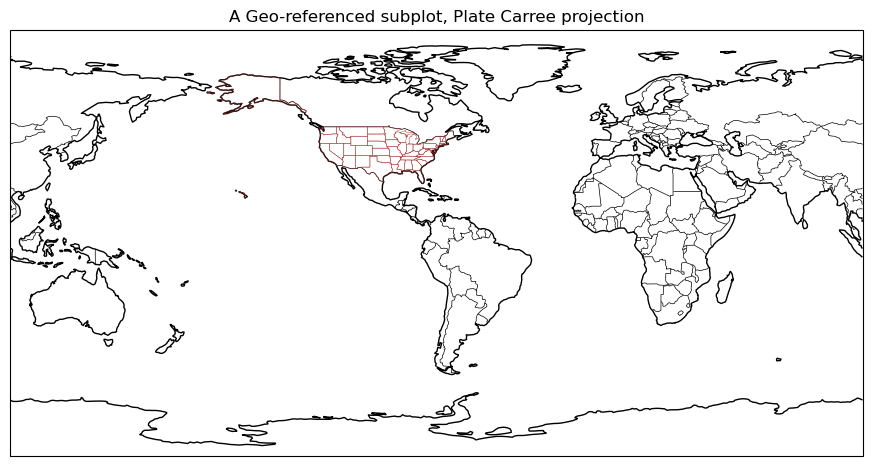

In [7]:
fig

## Exploring some of Cartopy's map projections

You can find a list of supported projections in Cartopy, with examples, at https://scitools.org.uk/cartopy/docs/latest/reference/crs.html

#### Mollweide Projection (often used with global satellite mosaics)

To save typing later, we can define a projection object to store the definition of the map projection. We can then use this object in the projection kwarg of the subplot method when creating a GeoAxes object. This allows us to use this exact projection in later scripts or Jupyter Notebook cells using simply the object name, instead of repeating the same call to ccrs.


Text(0.5, 1.0, 'Mollweide Projection')

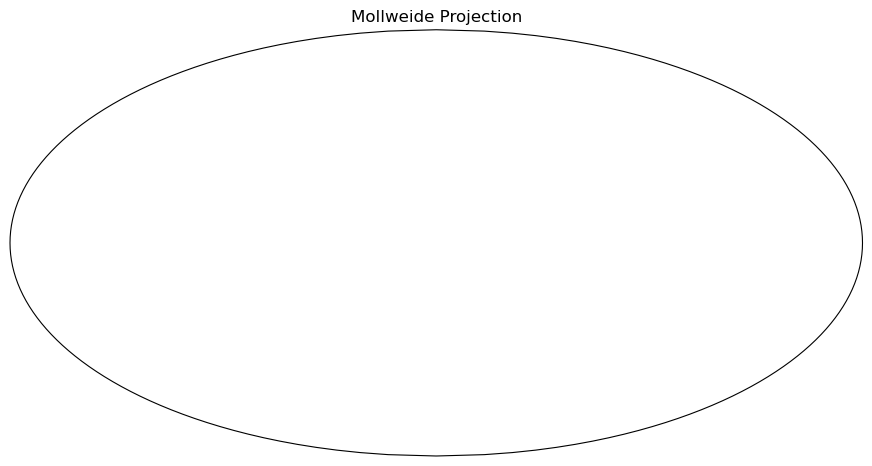

In [8]:
fig = plt.figure(figsize=(11, 8.5))
projMoll = ccrs.Mollweide(central_longitude=0)
ax = plt.subplot(1, 1, 1, projection=projMoll)
ax.set_title("Mollweide Projection")

##### Add in the cartographic shapefiles

This example shows how to add cartographic features to the Mollweide projection defined earlier:

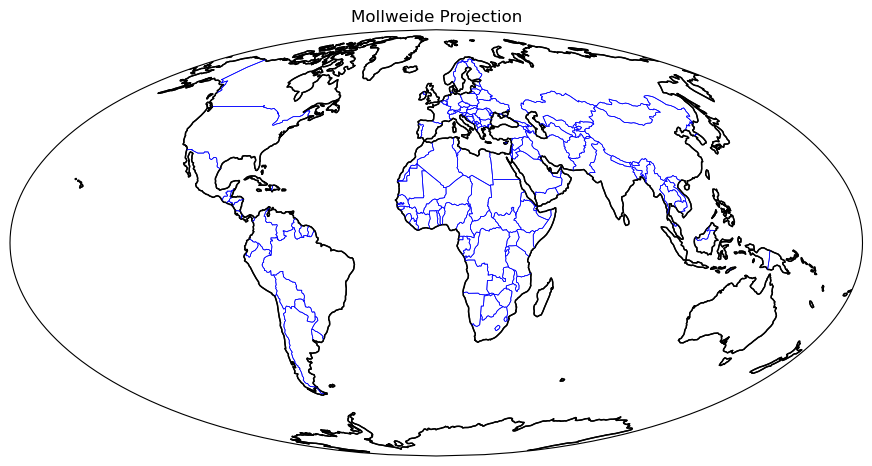

In [10]:
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')
fig

##### Add a fancy background image to the map

We can also use the stock_img method to add a pre-created background to a Mollweide-projection plot::

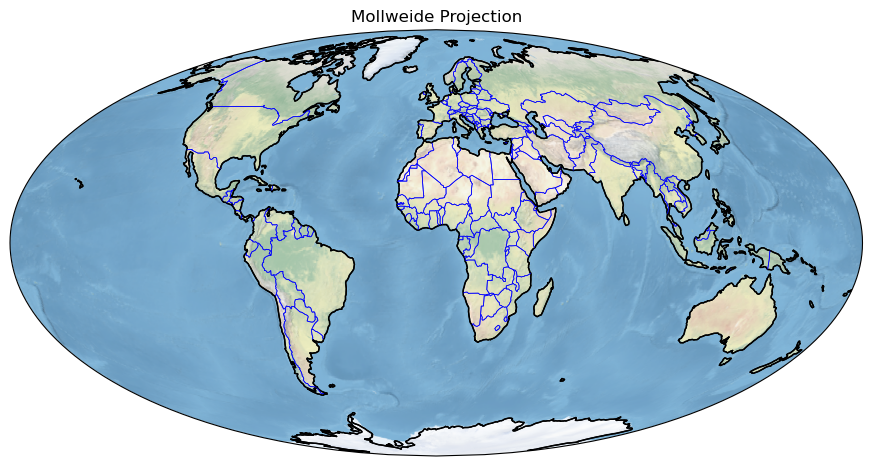

In [12]:
ax.stock_img()
fig

#### Mollweide Projection (often used with global satellite mosaics)

This example is similar to the above example set, except it uses a Lambert azimuthal equal-area projection instead:

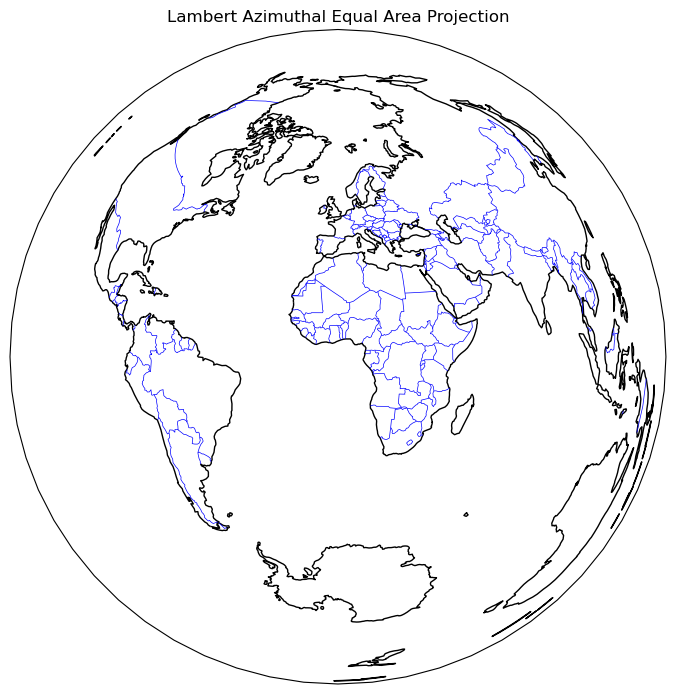

In [13]:
fig = plt.figure(figsize=(11, 8.5))
projLae = ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=0.0)
ax = plt.subplot(1, 1, 1, projection=projLae)
ax.set_title('Lambert Azimuthal Equal Area Projection')
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')

### Creating regional maps

#### Cartopy's set_extent method

For this example, let’s create another PlateCarree projection, but this time, we’ll use Cartopy’s set_extent method to restrict the map coverage to a North American view. Let’s also choose a lower resolution for coastlines, just to illustrate how one can specify that. In addition, let’s also plot the latitude and longitude lines.

Natural Earth defines three resolutions for cartographic features, specified as the strings “10m”, “50m”, and “110m”. Only one resolution can be used at a time, and the higher the number, the less detailed the feature becomes. You can view the documentation for this functionality at the following reference link: https://www.naturalearthdata.com/downloads/

In [14]:
projPC = ccrs.PlateCarree()
lonW = -140
lonE = -40
latS = 15
latN = 65
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

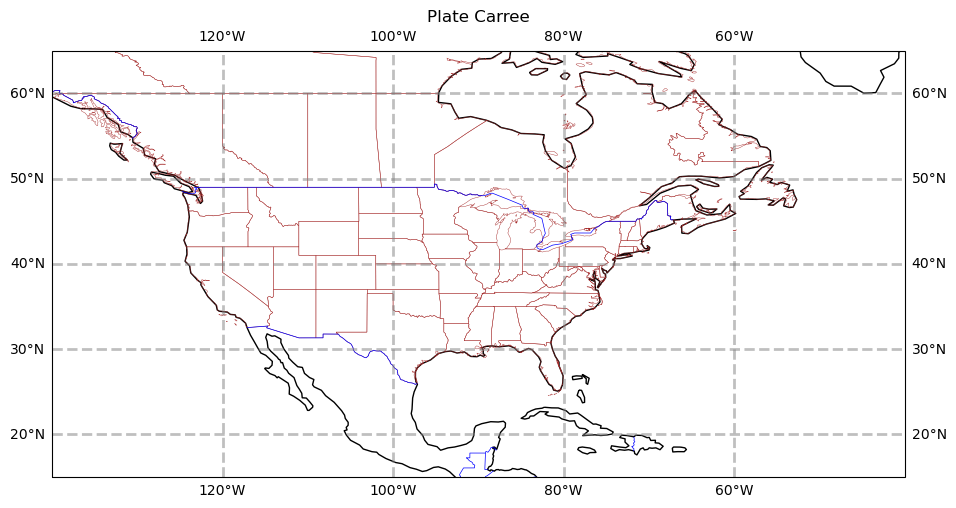

In [15]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Plate Carree')
gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines(resolution=res, color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');


The PlateCarree projection exaggerates the spatial extent of regions closer to the poles. In the following examples, we use set_extent with stereographic and Lambert-conformal projections, which display polar regions more accurately.

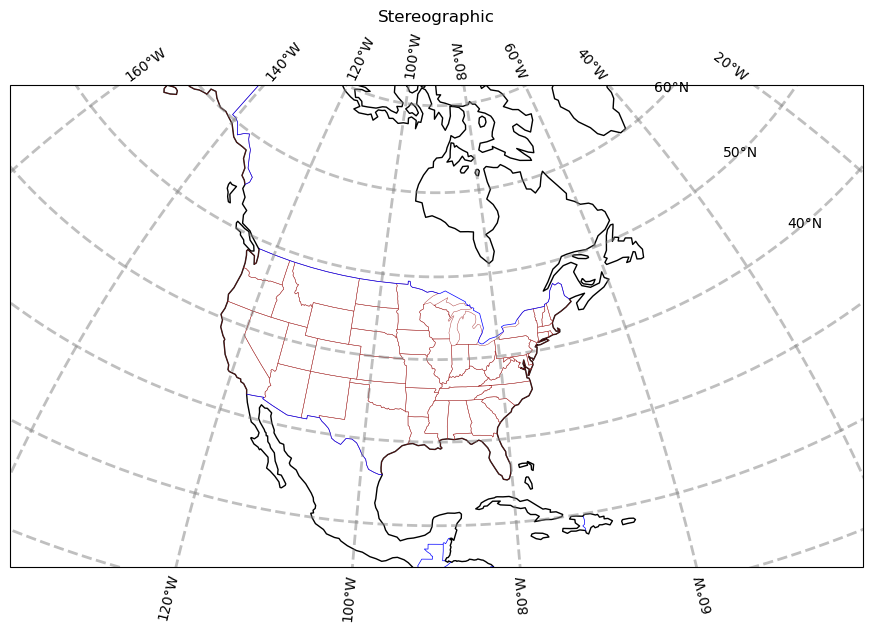

In [16]:
projStr = ccrs.Stereographic(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projStr)
ax.set_title('Stereographic')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines(resolution=res, color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

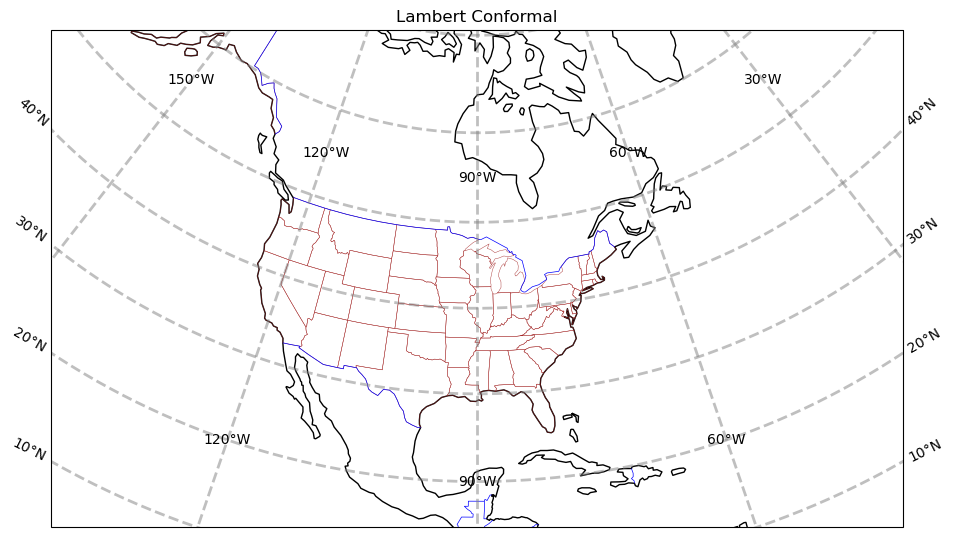

In [17]:
projLcc = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projLcc)
ax.set_title('Lambert Conformal')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines(resolution='110m', color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
# End last line with a semicolon to suppress text output to the screen
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

Info

Lat/lon labeling for projections other than Mercator and PlateCarree is a recent addition to Cartopy. As you can see, work still needs to be done to improve the placement of labels.

#### Create a regional map centered over New York State

Here we set the domain, which defines the geographical region to be plotted. (This is used in the next section in a set_extent call.) Since these coordinates are expressed in degrees, they correspond to a PlateCarree projection, even though the map projection is set to LambertConformal.

In [18]:
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
projLccNY = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

#### Add some predefined features

Some cartographical features are predefined as constants in the cartopy.feature package. The resolution of these features depends on the amount of geographical area in your map, specified by set_extent.

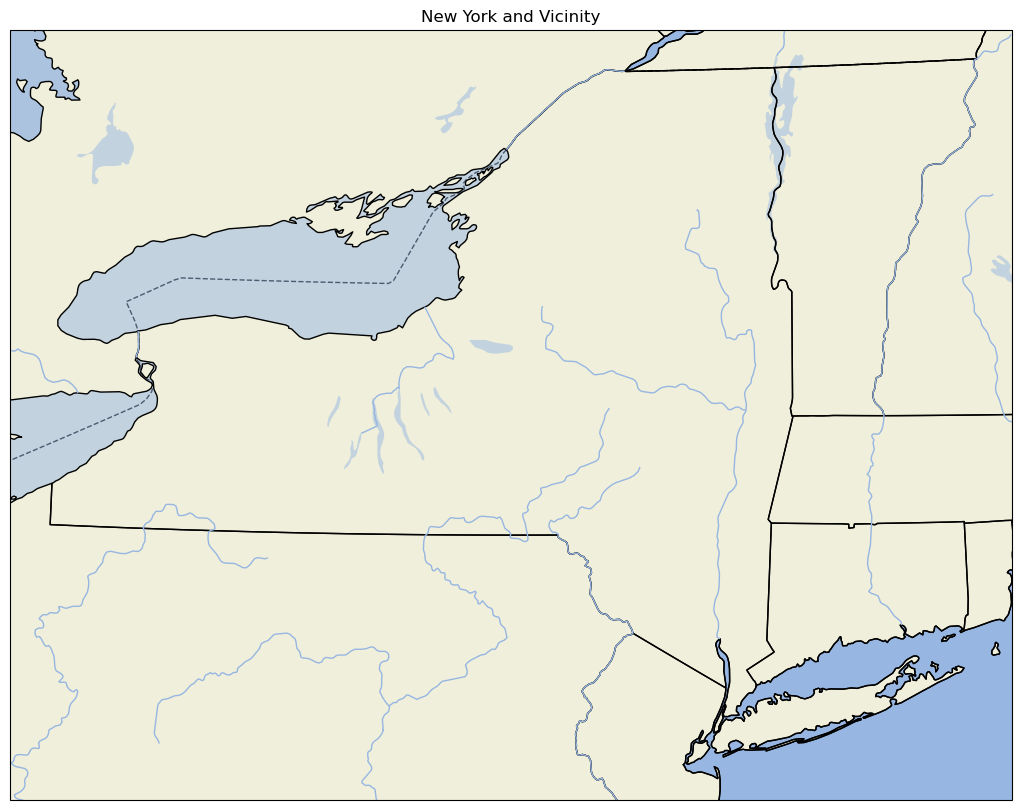

In [19]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=projLccNY)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.set_title('New York and Vicinity');

#### Use lower-resolution shapefiles from Natural Earth

In this example, we create a new map. This map uses lower-resolution shapefiles from Natural Earth, and also eliminates the plotting of country borders.

This example requires much more code than previous examples on this page. First, we must create new objects associated with lower-resolution shapefiles. This is performed by the NaturalEarthFeature method, which is part of the Cartopy feature class. Second, we call add_feature to add the new objects to our new map.

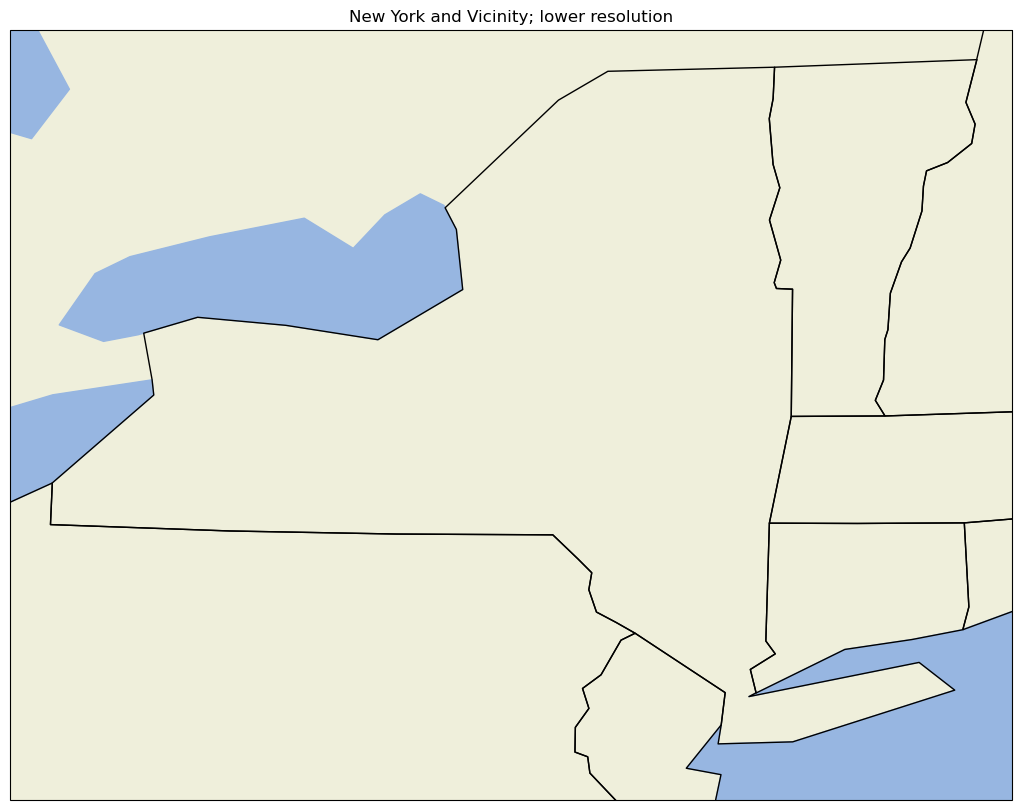

In [20]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=projLccNY)
ax.set_extent((lonW, lonE, latS, latN), crs=projPC)

# The features with names such as cfeature.LAND, cfeature.OCEAN, are higher-resolution (10m)
# shapefiles from the Naturalearth repository.  Lower resolution shapefiles (50m, 110m) can be
# used by using the cfeature.NaturalEarthFeature method as illustrated below.

resolution = '110m'

land_mask = cfeature.NaturalEarthFeature(
    'physical',
    'land',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['land'],
)
sea_mask = cfeature.NaturalEarthFeature(
    'physical',
    'ocean',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['water'],
)
lake_mask = cfeature.NaturalEarthFeature(
    'physical',
    'lakes',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['water'],
)
state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lakes',
    scale=resolution,
    facecolor='none',
)

ax.add_feature(land_mask)
ax.add_feature(sea_mask)
ax.add_feature(lake_mask)
ax.add_feature(state_borders, linestyle='solid', edgecolor='black')
ax.set_title('New York and Vicinity; lower resolution');

#### A figure with two different regional maps

Finally, let’s create a figure with two subplots. On the first subplot, we’ll repeat the high-resolution New York State map created earlier; on the second, we’ll plot over a different part of the world

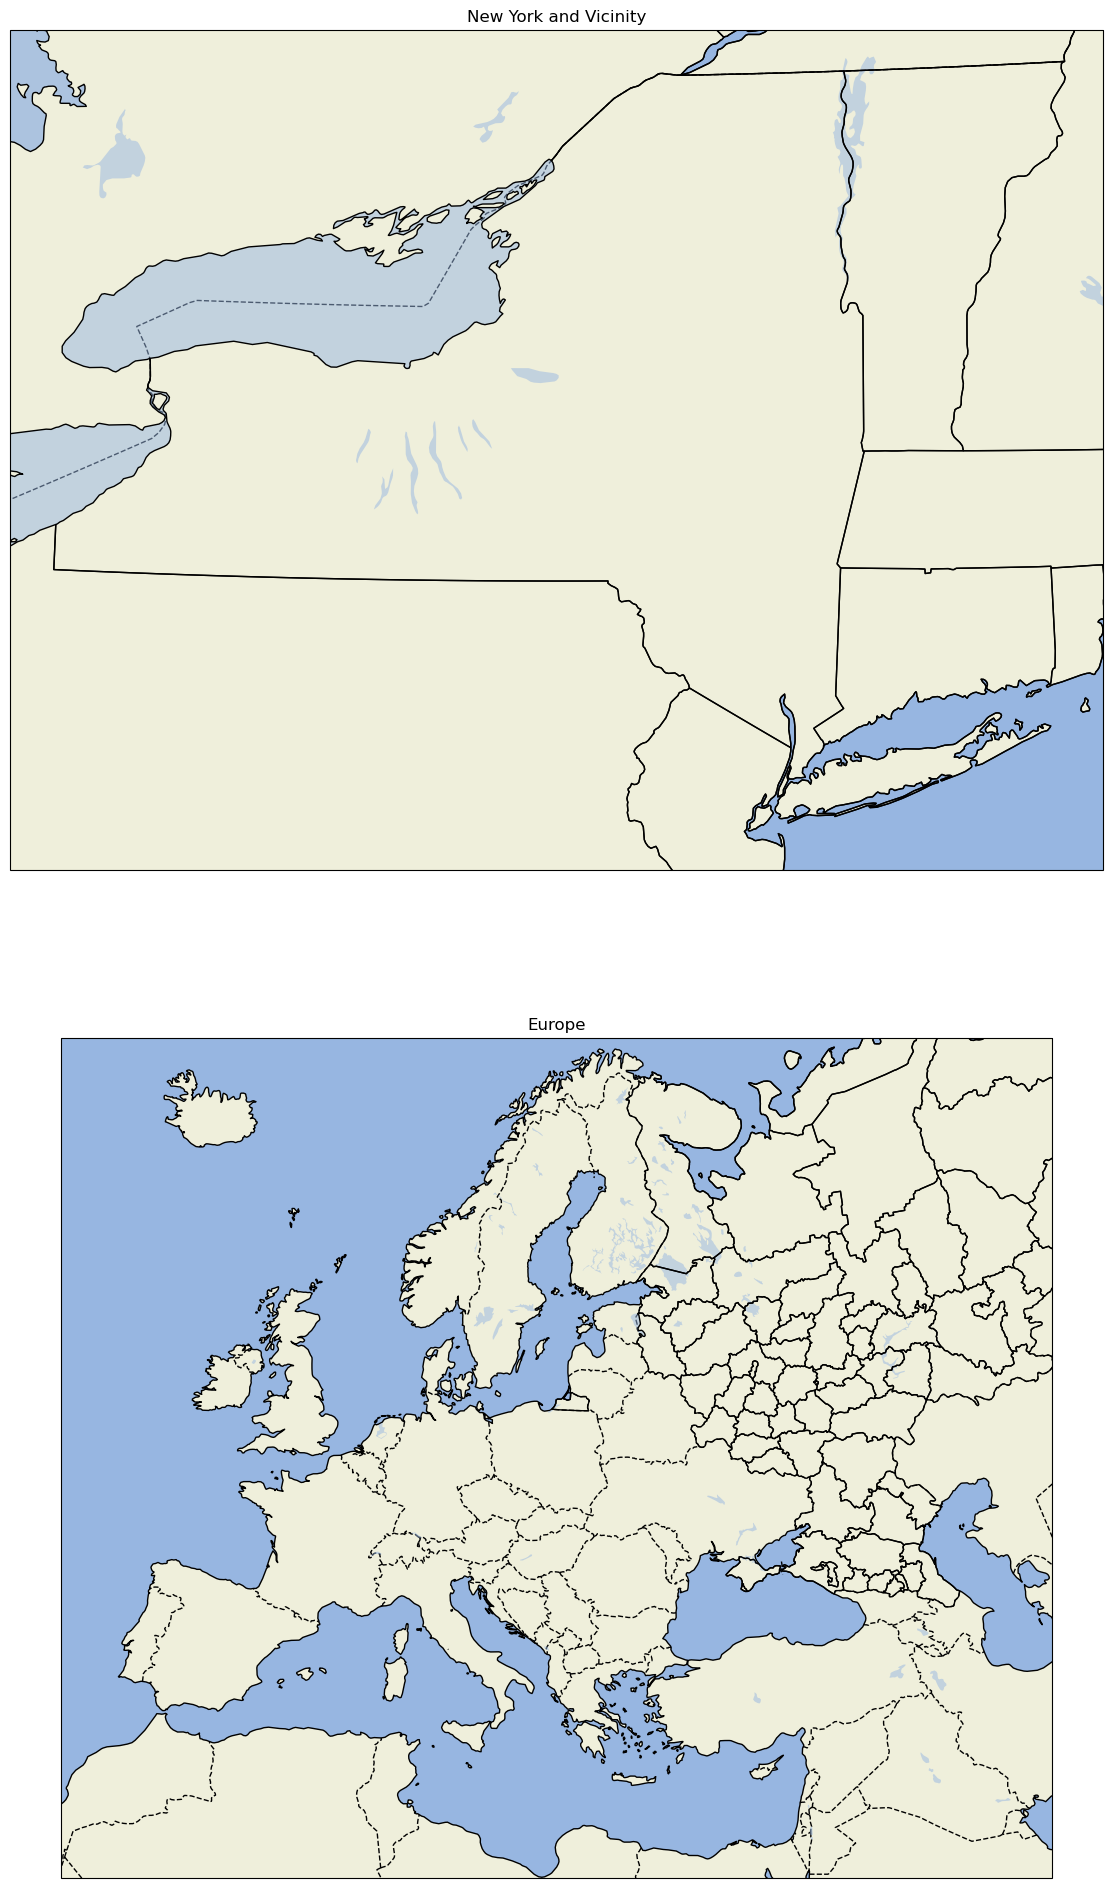

In [23]:
# Create the figure object
fig = plt.figure(
    figsize=(30, 24)
)  # Notice we need a bigger "canvas" so these two maps will be of a decent size

# First subplot
ax = plt.subplot(2, 1, 1, projection=projLccNY)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES)
ax.set_title('New York and Vicinity')

# Set the domain for defining the second plot region.
latN = 70
latS = 30.2
lonW = -10
lonE = 50
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2

projLccEur = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# Second subplot
ax2 = plt.subplot(2, 1, 2, projection=projLccEur)
ax2.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax2.set_facecolor(cfeature.COLORS['water'])
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle='--')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.STATES)
ax2.set_title('Europe');

### An expample of plotting data

First, we’ll create a lat-lon grid and define some data on it.

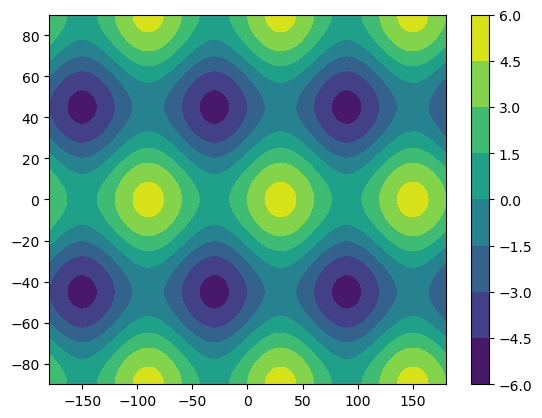

In [24]:
lon, lat = np.mgrid[-180:181, -90:91]
data = 2 * np.sin(3 * np.deg2rad(lon)) + 3 * np.cos(4 * np.deg2rad(lat))
plt.contourf(lon, lat, data)
plt.colorbar();

Plotting data on a Cartesian grid is equivalent to plotting data in the PlateCarree projection, where meridians and parallels are all straight lines with constant spacing. As a result of this simplicity, the global datasets we use often begin in the PlateCarree projection.

Once we create our map again, we can plot these data values as a contour map. We must also specify the transform keyword argument. This is an argument to a contour-plotting method that specifies the projection type currently used by our data. The projection type specified by this argument will be transformed into the projection type specified in the subplot method. Let’s plot our data in the Mollweide projection to see how shapes change under a transformation.

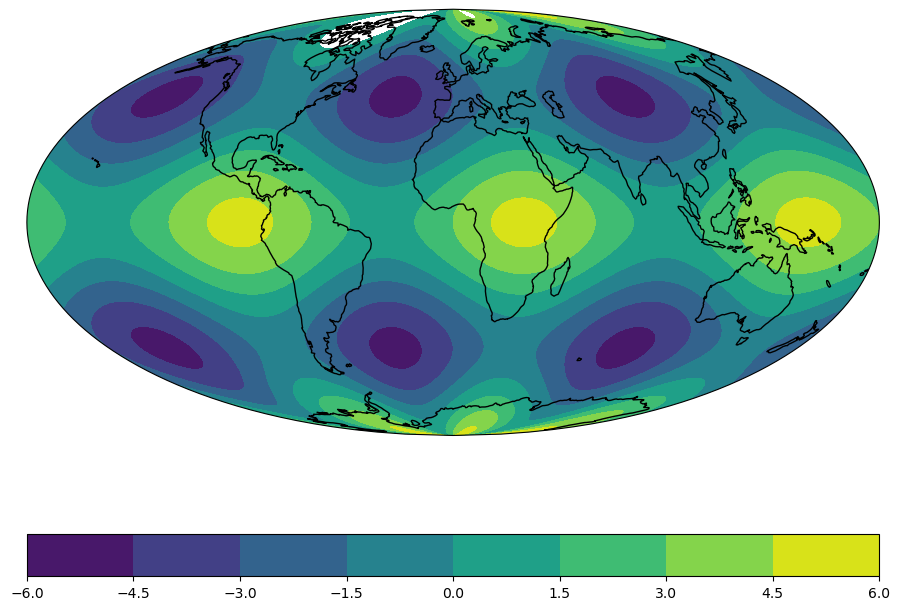

In [25]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projMoll)
ax.coastlines()
dataplot = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())
plt.colorbar(dataplot, orientation='horizontal');